In [22]:
import pandas as pd
import numpy as np


In [23]:
data = pd.read_csv('NIFTY22JANFUT.csv')
data

,Unnamed: 0,dateTime,open,high,low,close,volume
0,0,2021-12-23 09:15:00.0,17105.00,17129.95,17105.0,17106.15,0
1,1,2021-12-23 09:16:00.0,17106.05,17116.00,17100.3,17116.00,12050
2,2,2021-12-23 09:17:00.0,17116.15,17117.85,17102.7,17107.90,5800
3,3,2021-12-23 09:18:00.0,17107.90,17120.00,17107.9,17116.70,7450
4,4,2021-12-23 09:19:00.0,17116.70,17116.70,17105.4,17106.10,4600
...,...,...,...,...,...,...,...
8298,8298,2022-01-21 15:27:00.0,17645.80,17650.00,17645.8,17650.00,34500
8299,8299,2022-01-21 15:28:00.0,17651.00,17651.00,17646.0,17647.75,43550
8300,8300,2022-01-21 15:29:00.0,17647.35,17650.00,17644.0,17647.90,42150
8301,8301,2022-01-21 15:30:00.0,17647.90,17647.90,17647.9,17647.90,0


In [24]:
data.index

RangeIndex(start=0, stop=8303, step=1)

<AxesSubplot:>

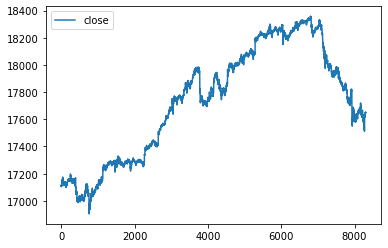

In [25]:
data.plot.line(y='close', use_index = True)

In [26]:
data['Target'] = data['close'].shift(-1)
data

,Unnamed: 0,dateTime,open,high,low,close,volume,Target
0,0,2021-12-23 09:15:00.0,17105.00,17129.95,17105.0,17106.15,0,17116.00
1,1,2021-12-23 09:16:00.0,17106.05,17116.00,17100.3,17116.00,12050,17107.90
2,2,2021-12-23 09:17:00.0,17116.15,17117.85,17102.7,17107.90,5800,17116.70
3,3,2021-12-23 09:18:00.0,17107.90,17120.00,17107.9,17116.70,7450,17106.10
4,4,2021-12-23 09:19:00.0,17116.70,17116.70,17105.4,17106.10,4600,17117.00
...,...,...,...,...,...,...,...,...
8298,8298,2022-01-21 15:27:00.0,17645.80,17650.00,17645.8,17650.00,34500,17647.75
8299,8299,2022-01-21 15:28:00.0,17651.00,17651.00,17646.0,17647.75,43550,17647.90
8300,8300,2022-01-21 15:29:00.0,17647.35,17650.00,17644.0,17647.90,42150,17647.90
8301,8301,2022-01-21 15:30:00.0,17647.90,17647.90,17647.9,17647.90,0,17647.90


In [27]:
data.isnull().sum()

Unnamed: 0    0
dateTime      0
open          0
high          0
low           0
close         0
volume        0
Target        1
dtype: int64

In [28]:
data=data.dropna()
data=data.drop(0)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
X = data[['open', 'high','low','close','volume']]
y = data['Target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)
y_pred

array([18242.00078538, 18059.6571313 , 17833.65426068, ...,
       17795.39159322, 17836.16939394, 17682.91583008])

In [35]:
lr.score(X_test,y_test)

0.99972993260371

In [38]:
lr.coef_


array([-7.08295314e-02,  1.03479008e-01,  1.81851378e-02,  9.48715369e-01,
       -7.39537099e-07])